#### Dataset to be used: MNIST (English handwritten numerals) (you can download the dataset from kaggle [MNIST A-Z dataset](https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format). Create different classification models using classifiers such as KNN, SVM, DT, ANN. Provide information on the classifier settings(e.g: KNN: value of k for kNN classifier; SVM: kernel and other parameters used in SVM classifier; DT: depth and leaf nodes; ANN: activation function, loss function,  etc.). Discuss the experimental results for these different classifiers. Also check for overfitting of the models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/A_Z Handwritten Data.csv')

In [4]:
data.shape

(372450, 785)

In [5]:
data.sample(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
294217,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
268405,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119303,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
117013,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [7]:
def convert(text):
    dic = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',
                        11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
    return dic[text]

In [8]:
y = y.apply(lambda x: convert(x))

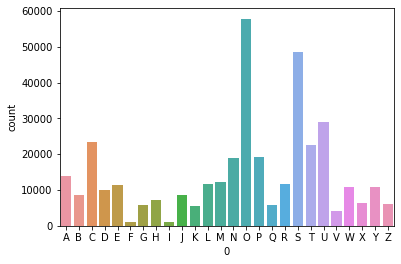

In [9]:
sns.countplot(y)

In [10]:
(y.shape, X.shape)

((372450,), (372450, 784))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    stratify=y, random_state=42)

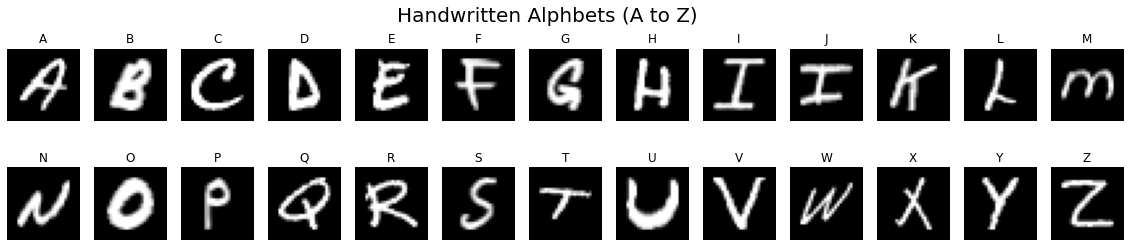

In [12]:
fig = plt.figure(figsize=(20,4))
yt_nd = y_train.to_numpy()

for i, x in enumerate(np.sort(y_train.unique())):
    plt.subplot(2, 13, i+1)
    idx = (y_train==x).index[42]
    plt.imshow(X_train.iloc[np.where(yt_nd==x)[0][42]].values.reshape(28, 28),
               cmap='gray')
    plt.axis("off")
    plt.title(x)

plt.suptitle("Handwritten Alphbets (A to Z)", fontsize=20)
plt.show()

In [13]:
stanScaler = StandardScaler()

X_train = stanScaler.fit_transform(X_train)
X_test = stanScaler.transform(X_test)

In [14]:
pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [15]:
pca.n_components_

146

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 52), max_iter=50, verbose=True)
svc = SVC(gamma = 0.001, verbose=True)
knn = KNeighborsClassifier(n_neighbors=9)
dtc = DecisionTreeClassifier()

clfs = [dtc, knn, mlp, svc ]

In [17]:
accs = []; f1s = []; precs = []; recs = []; name = []

for clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accs.append(round(accuracy_score(y_test, y_pred)*100,2))
    f1s.append(round(f1_score(y_test, y_pred, average='weighted')*100, 2))
    precs.append(round(precision_score(y_test, y_pred, average='weighted')*100,2))
    recs.append(round(recall_score(y_test, y_pred, average='weighted')*100,2))
    name.append(type(clf).__name__)

Iteration 1, loss = 0.31771678
Iteration 2, loss = 0.11210747
Iteration 3, loss = 0.08080971
Iteration 4, loss = 0.06307341
Iteration 5, loss = 0.05182163
Iteration 6, loss = 0.04597092
Iteration 7, loss = 0.04197270
Iteration 8, loss = 0.03390008
Iteration 9, loss = 0.03285644
Iteration 10, loss = inf
Iteration 11, loss = 0.02289102
Iteration 12, loss = 0.02241065
Iteration 13, loss = 0.02159838
Iteration 14, loss = 0.02303348
Iteration 15, loss = 0.02095409
Iteration 16, loss = 0.02266720
Iteration 17, loss = 0.01768869
Iteration 18, loss = 0.01955520
Iteration 19, loss = 0.01955205
Iteration 20, loss = 0.01640677
Iteration 21, loss = 0.01692738
Iteration 22, loss = 0.01744986
Iteration 23, loss = 0.01528066
Iteration 24, loss = 0.01696382
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = 0.01364627
Iteration 28, loss = 0.01613517
Iteration 29, loss = 0.01522786
Iteration 30, loss = 0.01566653
Iteration 31, loss = 0.01519690
Iteration 32, loss = 0.01315745
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

In [18]:
metric_df = pd.DataFrame({"Accuracy": accs, "F1 Score": f1s, "Precsion": precs,
                         "Recall": recs}, index=name)
display(metric_df)

,Accuracy,F1 Score,Precsion,Recall
DecisionTreeClassifier,95.53,95.49,95.50,95.53
KNeighborsClassifier,95.76,95.72,95.81,95.76
MLPClassifier,99.17,99.17,99.18,99.17
SVC,97.16,97.16,97.17,97.16
